In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [3]:
# Display basic information
print("Basic information in Customers.csv:\n",customers_df.info())
print("\nBasic information in Products.csv:\n",products_df.info())
print("\nBasic information in Transactions.csv:\n",transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Basic information in Customers.csv:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Basic information in Products.csv:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Col

In [4]:
# Check for missing values
print("Missing values in Customers.csv:\n", customers_df.isnull().sum())
print("\nMissing values in Products.csv:\n", products_df.isnull().sum())
print("\nMissing values in Transactions.csv:\n", transactions_df.isnull().sum())

Missing values in Customers.csv:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products.csv:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions.csv:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
# Check for duplicates
print("Duplicate rows in Customers.csv:", customers_df.duplicated().sum())
print("Duplicate rows in Products.csv:", products_df.duplicated().sum())
print("Duplicate rows in Transactions.csv:", transactions_df.duplicated().sum())

Duplicate rows in Customers.csv: 0
Duplicate rows in Products.csv: 0
Duplicate rows in Transactions.csv: 0


In [6]:
# Display descriptive statistics
print("Descriptive statistics for Customers.csv:\n", customers_df.describe(include='all'))
print("\nDescriptive statistics for Products.csv:\n", products_df.describe(include='all'))
print("\nDescriptive statistics for Transactions.csv:\n", transactions_df.describe())

Descriptive statistics for Customers.csv:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Descriptive statistics for Products.csv:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  

In [7]:
# Merge datasets for complete analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82


In [8]:
# Business Insights
# Insight 1: Top 5 Products by Revenue
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Revenue:\n", top_products)

Top 5 Products by Revenue:
 ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


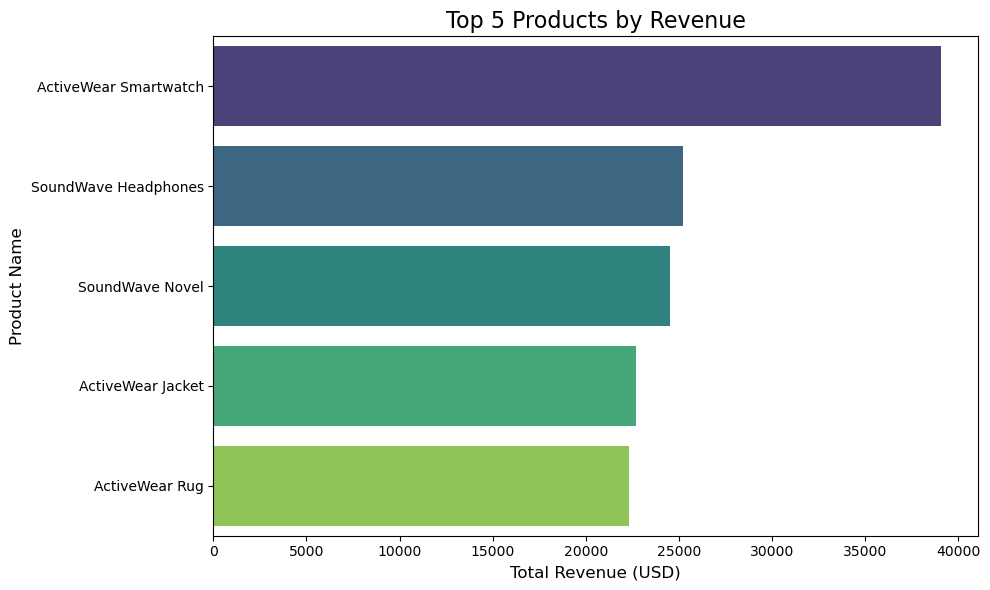

In [9]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 5 Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue (USD)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
# Insight 2: Revenue by Region
revenue_by_region = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", revenue_by_region)

Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


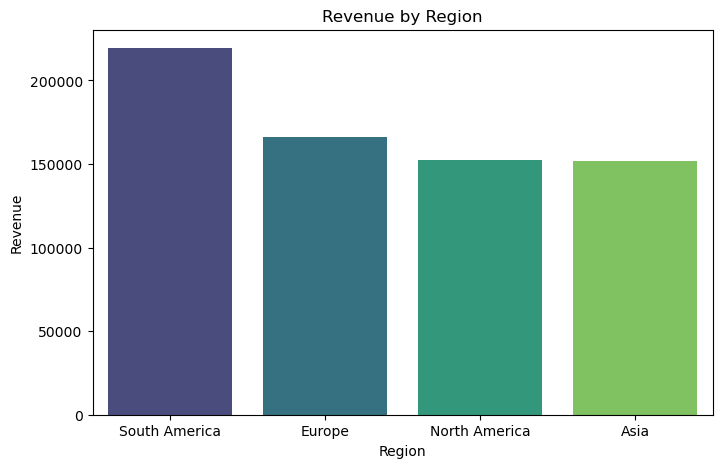

In [11]:
# Revenue by Region
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="viridis")
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()


Monthly Sales Trend:
 Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


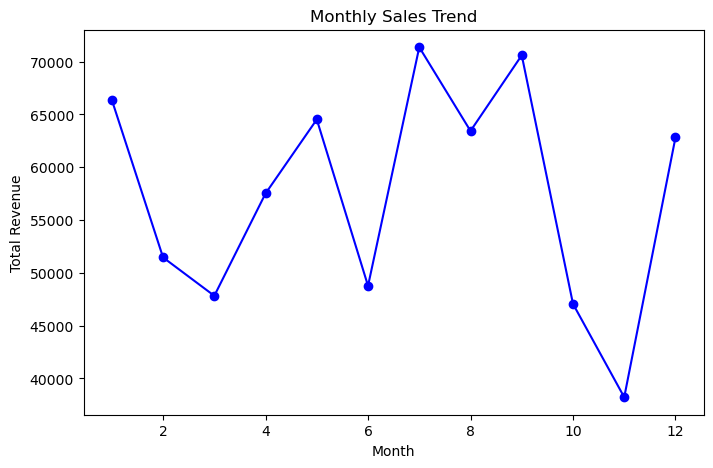

In [12]:
# Insight 3: Monthly Sales Trend
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['Month'] = merged_df['TransactionDate'].dt.month
monthly_sales = merged_df.groupby('Month')['TotalValue'].sum()
print("Monthly Sales Trend:\n", monthly_sales)

# Monthly Sales Trend
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


In [13]:
# Insight 4: Popular Categories
popular_categories = merged_df.groupby('Category')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Popular Categories:\n", popular_categories)

Top 5 Popular Categories:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


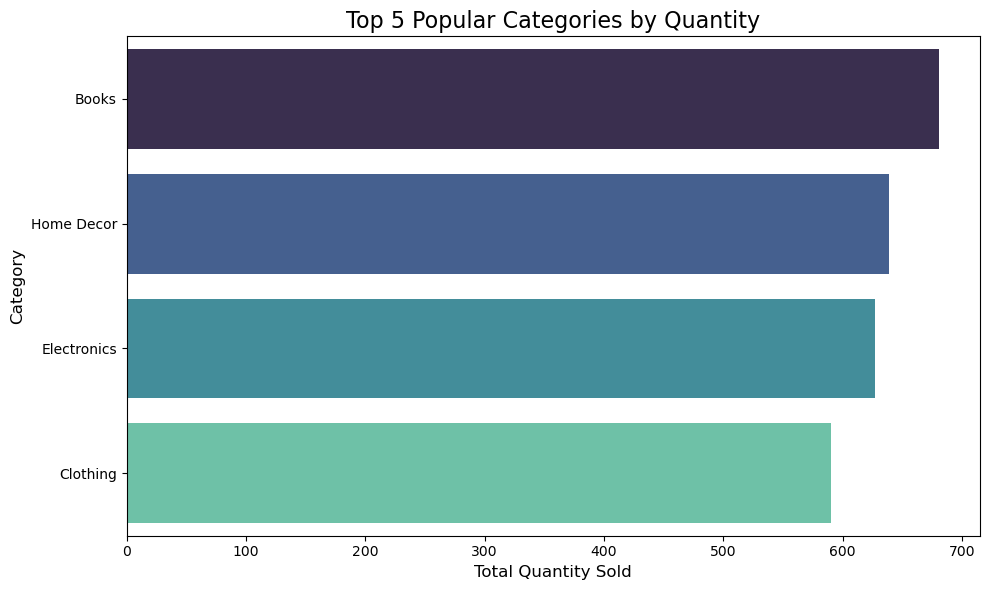

In [14]:
# Visualization for Popular Categories
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_categories.values, y=popular_categories.index, palette="mako")
plt.title("Top 5 Popular Categories by Quantity", fontsize=16)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [15]:
# Insight 5: High-value Customers
high_value_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 High-value Customers:\n", high_value_customers)

Top 5 High-value Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


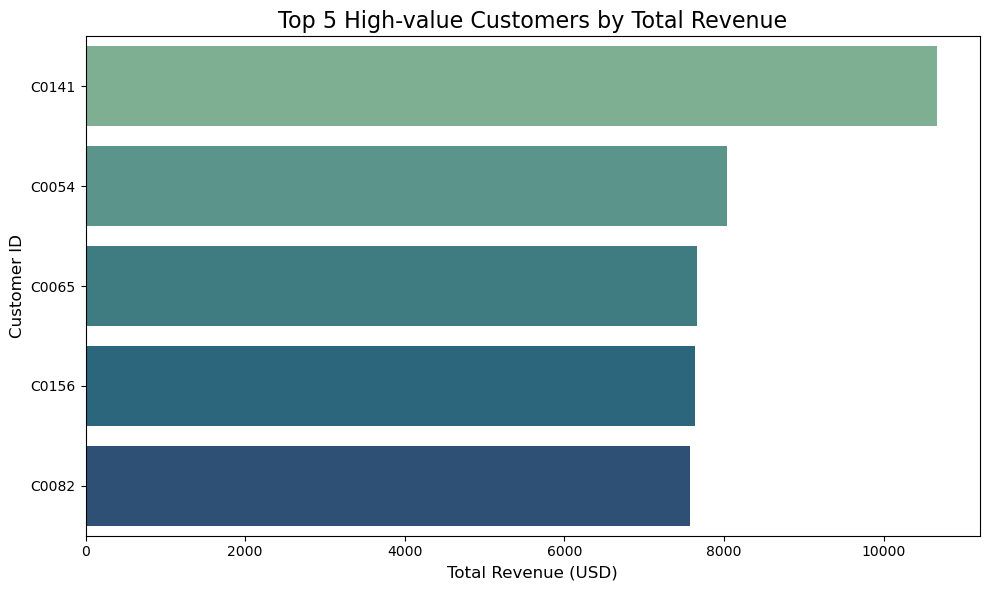

In [16]:
# Visualization for High-value Customers
plt.figure(figsize=(10, 6))
sns.barplot(x=high_value_customers.values, y=high_value_customers.index, palette="crest")
plt.title("Top 5 High-value Customers by Total Revenue", fontsize=16)
plt.xlabel("Total Revenue (USD)", fontsize=12)
plt.ylabel("Customer ID", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Business Insights

- ActiveWear Smartwatch ,Jacket and Rug has more revenue comapared to SoundWave Headphones and Novel it means that customer like activewear 
- C0141,C0054,C0065 ,C0156 and C0082 are top 5 high value customers in total revenue we have to focus on other customer to maximize profit.
- Top categories are Books,Home Decor, Electronics and Clothing we have to focus on this also tried to increase the sell of other categories of 
-  Month like 3,6,10 and 11 has low sales we have to focus on month 10 and 11 which has low sales for improve sales.
- South America , Europe,North America and Asia are highest sales region. We have to focus on region like africa and also increase sales in asia and north america